In [1]:
import pandas as pd
from pandas import Series,DataFrame
with open('验证集1.csv',mode = 'r',encoding = 'UTF-8')as f:
    data = pd.read_csv(f,names = None)
   
data

,formula,formation energy
0,LiGaSe2,-0.911
1,Zn2NCl,-0.713
2,CaP2Xe5F22,-2.027
3,KCrPO4F,-2.768
4,CdAg2GeS4,-0.677
...,...,...
207,LiAs(HO2)2,-1.765
208,Rb2U2Mo3O16,-2.682
209,Sr3La2(BO3)4,-3.382
210,PbCN2,-0.072


In [2]:
from matminer.featurizers.conversions import StrToComposition
data = StrToComposition().featurize_dataframe(data, 'formula')
data.head()

StrToComposition:   0%|          | 0/212 [00:00<?, ?it/s]

,formula,formation energy,composition
0,LiGaSe2,-0.911,"(Li, Ga, Se)"
1,Zn2NCl,-0.713,"(Zn, N, Cl)"
2,CaP2Xe5F22,-2.027,"(Ca, P, Xe, F)"
3,KCrPO4F,-2.768,"(K, Cr, P, O, F)"
4,CdAg2GeS4,-0.677,"(Cd, Ag, Ge, S)"


In [3]:
from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name = 'magpie')
data = ep_feat.featurize_dataframe(data, col_id = 'composition')
data.head()

ElementProperty:   0%|          | 0/212 [00:00<?, ?it/s]

,formula,formation energy,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,LiGaSe2,-0.911,"(Li, Ga, Se)",3.0,34.0,31.0,25.500000,11.250000,34.0,1.0,...,0.0,0.0,0.0,0.0,14.0,229.0,215.0,80.250000,74.375000,14.0
1,Zn2NCl,-0.713,"(Zn, N, Cl)",7.0,30.0,23.0,21.000000,9.000000,30.0,69.0,...,0.0,0.0,0.0,0.0,64.0,194.0,130.0,161.500000,48.750000,194.0
2,CaP2Xe5F22,-2.027,"(Ca, P, Xe, F)",9.0,54.0,45.0,17.266667,12.426667,9.0,7.0,...,0.0,0.0,0.0,0.0,2.0,225.0,223.0,56.133333,67.546667,15.0
3,KCrPO4F,-2.768,"(K, Cr, P, O, F)",8.0,24.0,16.0,12.375000,5.218750,8.0,3.0,...,0.0,0.0,0.0,0.0,2.0,229.0,227.0,65.375000,81.812500,12.0
4,CdAg2GeS4,-0.677,"(Cd, Ag, Ge, S)",16.0,48.0,32.0,29.750000,13.750000,16.0,65.0,...,0.0,0.0,0.0,0.0,70.0,225.0,155.0,143.625000,73.625000,70.0


In [4]:
exclude = ['formula', 'composition']#, 'composition_oxid'
data_re = data.drop(exclude, axis = 1)
data_re.head()

,formation energy,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,-0.911,3.0,34.0,31.0,25.500000,11.250000,34.0,1.0,89.0,88.0,...,0.0,0.0,0.0,0.0,14.0,229.0,215.0,80.250000,74.375000,14.0
1,-0.713,7.0,30.0,23.0,21.000000,9.000000,30.0,69.0,94.0,25.0,...,0.0,0.0,0.0,0.0,64.0,194.0,130.0,161.500000,48.750000,194.0
2,-2.027,9.0,54.0,45.0,17.266667,12.426667,9.0,7.0,102.0,95.0,...,0.0,0.0,0.0,0.0,2.0,225.0,223.0,56.133333,67.546667,15.0
3,-2.768,8.0,24.0,16.0,12.375000,5.218750,8.0,3.0,93.0,90.0,...,0.0,0.0,0.0,0.0,2.0,229.0,227.0,65.375000,81.812500,12.0
4,-0.677,16.0,48.0,32.0,29.750000,13.750000,16.0,65.0,88.0,23.0,...,0.0,0.0,0.0,0.0,70.0,225.0,155.0,143.625000,73.625000,70.0


In [5]:
data_VT = data_re

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.96 * (1 - .96)))
sel.fit_transform(data_VT)
data_VT.shape

(212, 133)

Optimal number of features : 15


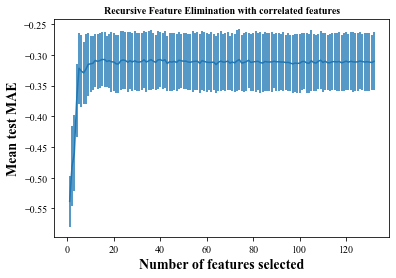

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
import numpy as np
plt.rcParams['font.sans-serif']=['Times New Roman']
min_features_to_select = 1  # Minimum number of features to consider

rfr = RandomForestRegressor(random_state=42)
rfecv = RFECV(
    estimator=rfr,
    scoring = 'neg_root_mean_squared_error',
    n_jobs= -1
    
    
)
excluded = ['formation energy']
X = data_re.drop(excluded, axis = 1)
y = data_re['formation energy'].values
y = [ float(i) for i in y]
y = np.array(y,dtype=np.float32)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected",fontsize = 14,fontproperties={'weight': 'bold'})
plt.ylabel("Mean test MAE",fontsize = 14,fontproperties={'weight': 'bold'})
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with correlated features",fontsize = 14,fontproperties={'weight': 'bold'})
plt.savefig('test gbr.png', dpi = 600,format = 'png',transparent = True,bbox_inches='tight')
plt.show()

In [7]:
rfecv.cv_results_

{'mean_test_score': array([-0.53836038, -0.48167724, -0.45986865, -0.37450574, -0.32180814,
        -0.32630938, -0.32929115, -0.32326025, -0.31543528, -0.31456807,
        -0.31373667, -0.30910984, -0.31063971, -0.30930751, -0.3075324 ,
        -0.3076463 , -0.31076078, -0.30941541, -0.31134449, -0.31158135,
        -0.31457826, -0.31491073, -0.30934496, -0.30835858, -0.30912192,
        -0.31204647, -0.30946694, -0.31173364, -0.30953493, -0.31152943,
        -0.31180502, -0.31069535, -0.30806336, -0.31170821, -0.30973305,
        -0.30781505, -0.31026138, -0.3122071 , -0.30821948, -0.30774001,
        -0.30961147, -0.30798303, -0.31409201, -0.31108969, -0.31169205,
        -0.31065089, -0.31234249, -0.30868202, -0.30961213, -0.31034877,
        -0.31017281, -0.31168687, -0.31206203, -0.31085325, -0.31048761,
        -0.31033343, -0.3137209 , -0.30949706, -0.31081071, -0.31200068,
        -0.31234734, -0.31217555, -0.3117787 , -0.31572284, -0.31218342,
        -0.31001011, -0.31174205

In [8]:
rfecv.cv_results_

{'mean_test_score': array([-0.53836038, -0.48167724, -0.45986865, -0.37450574, -0.32180814,
        -0.32630938, -0.32929115, -0.32326025, -0.31543528, -0.31456807,
        -0.31373667, -0.30910984, -0.31063971, -0.30930751, -0.3075324 ,
        -0.3076463 , -0.31076078, -0.30941541, -0.31134449, -0.31158135,
        -0.31457826, -0.31491073, -0.30934496, -0.30835858, -0.30912192,
        -0.31204647, -0.30946694, -0.31173364, -0.30953493, -0.31152943,
        -0.31180502, -0.31069535, -0.30806336, -0.31170821, -0.30973305,
        -0.30781505, -0.31026138, -0.3122071 , -0.30821948, -0.30774001,
        -0.30961147, -0.30798303, -0.31409201, -0.31108969, -0.31169205,
        -0.31065089, -0.31234249, -0.30868202, -0.30961213, -0.31034877,
        -0.31017281, -0.31168687, -0.31206203, -0.31085325, -0.31048761,
        -0.31033343, -0.3137209 , -0.30949706, -0.31081071, -0.31200068,
        -0.31234734, -0.31217555, -0.3117787 , -0.31572284, -0.31218342,
        -0.31001011, -0.31174205

In [9]:
X_rfecv = rfecv.transform(X)

df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking')

df_feature_opt = df_features[df_features['support']==True]

df_feature_opt_num = df_feature_opt['feature']

df_feature_opt_feature = []
for i in df_feature_opt_num:
    df_feature_opt_feature.append(X.columns[i])

C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row,

C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row,

C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row,

C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\WA\AppData\Local\Temp\ipykernel_4668\3946019898.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row,

In [10]:
df_feature_opt_feature1 = df_feature_opt_feature
df_feature_opt_feature1

['MagpieData avg_dev MeltingT',
 'MagpieData avg_dev CovalentRadius',
 'MagpieData maximum Electronegativity',
 'MagpieData range Electronegativity',
 'MagpieData mean Electronegativity',
 'MagpieData avg_dev Electronegativity',
 'MagpieData mode Electronegativity',
 'MagpieData mean NdValence',
 'MagpieData avg_dev NdValence',
 'MagpieData avg_dev NValence',
 'MagpieData mean NUnfilled',
 'MagpieData avg_dev NUnfilled',
 'MagpieData maximum GSbandgap',
 'MagpieData avg_dev GSbandgap',
 'MagpieData mean SpaceGroupNumber']

In [11]:
data_3 = data_VT[df_feature_opt_feature]
data_3

,MagpieData avg_dev MeltingT,MagpieData avg_dev CovalentRadius,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData avg_dev NValence,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData maximum GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mean SpaceGroupNumber
0,66.620000,2.750000,2.55,1.57,1.972500,0.577500,2.55,7.500000,3.750000,5.250000,2.500000,1.250000,0.799,0.399500,80.250000
1,287.677500,17.750000,3.16,1.51,2.375000,0.725000,1.65,5.000000,5.000000,3.000000,1.000000,1.000000,6.437,2.232500,161.500000
2,104.040444,30.995556,3.98,2.98,3.531333,0.658044,3.98,1.666667,2.777778,3.155556,0.933333,0.373333,6.456,1.275667,56.133333
3,447.920937,40.062500,3.98,3.16,2.801250,0.933438,3.44,0.625000,1.093750,1.187500,2.375000,1.062500,1.970,0.674063,65.375000
4,373.853750,17.187500,2.58,0.89,2.235000,0.345000,2.58,5.000000,5.000000,3.000000,1.750000,0.812500,2.202,1.053125,143.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,273.990625,25.937500,3.44,2.46,2.665000,0.775000,3.44,1.250000,2.187500,3.187500,1.750000,0.562500,7.853,2.944875,103.875000
208,754.493006,50.328922,3.44,2.62,2.866087,0.798488,3.44,0.739130,1.156900,0.793951,4.000000,3.304348,0.000,0.000000,63.608696
209,785.567347,46.911565,3.44,2.49,2.594762,0.965986,3.44,0.095238,0.172336,1.632653,2.952381,1.931973,1.524,0.469986,89.095238
210,1342.786250,27.500000,3.04,0.71,2.740000,0.300000,3.04,2.500000,3.750000,8.750000,3.500000,0.500000,6.437,2.171250,201.750000


In [12]:
data_corr = data_VT[df_feature_opt_feature1]
data_corr

,MagpieData avg_dev MeltingT,MagpieData avg_dev CovalentRadius,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData avg_dev NValence,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData maximum GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mean SpaceGroupNumber
0,66.620000,2.750000,2.55,1.57,1.972500,0.577500,2.55,7.500000,3.750000,5.250000,2.500000,1.250000,0.799,0.399500,80.250000
1,287.677500,17.750000,3.16,1.51,2.375000,0.725000,1.65,5.000000,5.000000,3.000000,1.000000,1.000000,6.437,2.232500,161.500000
2,104.040444,30.995556,3.98,2.98,3.531333,0.658044,3.98,1.666667,2.777778,3.155556,0.933333,0.373333,6.456,1.275667,56.133333
3,447.920937,40.062500,3.98,3.16,2.801250,0.933438,3.44,0.625000,1.093750,1.187500,2.375000,1.062500,1.970,0.674063,65.375000
4,373.853750,17.187500,2.58,0.89,2.235000,0.345000,2.58,5.000000,5.000000,3.000000,1.750000,0.812500,2.202,1.053125,143.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,273.990625,25.937500,3.44,2.46,2.665000,0.775000,3.44,1.250000,2.187500,3.187500,1.750000,0.562500,7.853,2.944875,103.875000
208,754.493006,50.328922,3.44,2.62,2.866087,0.798488,3.44,0.739130,1.156900,0.793951,4.000000,3.304348,0.000,0.000000,63.608696
209,785.567347,46.911565,3.44,2.49,2.594762,0.965986,3.44,0.095238,0.172336,1.632653,2.952381,1.931973,1.524,0.469986,89.095238
210,1342.786250,27.500000,3.04,0.71,2.740000,0.300000,3.04,2.500000,3.750000,8.750000,3.500000,0.500000,6.437,2.171250,201.750000


In [13]:
outputpath='C:/Users/WA/Desktop/验证2.csv'
data_corr.to_csv(outputpath,sep=',',index=False,header=True)

In [14]:
data_corr_for_corr = data_corr.corr()

In [15]:
data_corr_for_corr.style.applymap(lambda v
                             : 'background-color: %s' %'#FFCCFF' if v>abs(0.5) 
                             else'background-color: %s'% '')

,MagpieData avg_dev MeltingT,MagpieData avg_dev CovalentRadius,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData avg_dev NValence,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData maximum GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mean SpaceGroupNumber
MagpieData avg_dev MeltingT,1.000000,0.184696,0.080856,0.068098,0.102398,0.104485,0.177667,-0.146888,-0.206374,-0.117984,0.414327,0.318366,-0.190296,-0.168867,0.099102
MagpieData avg_dev CovalentRadius,0.184696,1.000000,0.436255,0.698502,0.157199,0.722806,0.462479,-0.469149,-0.263335,-0.210118,0.130844,0.123897,-0.256489,-0.300666,-0.189995
MagpieData maximum Electronegativity,0.080856,0.436255,1.000000,0.705221,0.813719,0.605334,0.753240,-0.547623,-0.272986,-0.188123,-0.148457,-0.148624,0.026765,-0.071700,-0.552976
MagpieData range Electronegativity,0.068098,0.698502,0.705221,1.000000,0.304802,0.872620,0.602560,-0.559013,-0.374398,-0.277053,-0.027948,-0.023984,-0.138638,-0.206106,-0.342565
MagpieData mean Electronegativity,0.102398,0.157199,0.813719,0.304802,1.000000,0.143289,0.730346,-0.335711,-0.107621,-0.113617,-0.150216,-0.184245,0.043596,-0.085662,-0.663661
MagpieData avg_dev Electronegativity,0.104485,0.722806,0.605334,0.872620,0.143289,1.000000,0.556761,-0.517311,-0.320180,-0.234214,-0.005517,0.016139,-0.281996,-0.281500,-0.220916
MagpieData mode Electronegativity,0.177667,0.462479,0.753240,0.602560,0.730346,0.556761,1.000000,-0.472195,-0.207353,-0.194599,-0.052821,-0.100956,-0.180504,-0.281702,-0.590650
MagpieData mean NdValence,-0.146888,-0.469149,-0.547623,-0.559013,-0.335711,-0.517311,-0.472195,1.000000,0.627650,0.556181,0.019002,0.118064,-0.160773,-0.150374,0.197245
MagpieData avg_dev NdValence,-0.206374,-0.263335,-0.272986,-0.374398,-0.107621,-0.320180,-0.207353,0.627650,1.000000,0.666790,-0.035231,0.013054,-0.114138,-0.120596,0.082154
MagpieData avg_dev NValence,-0.117984,-0.210118,-0.188123,-0.277053,-0.113617,-0.234214,-0.194599,0.556181,0.666790,1.000000,0.057200,0.073209,-0.013795,-0.033668,0.124597


In [16]:
list_for = df_feature_opt_feature+['formation energy']

In [17]:
data_corr_for = data_VT[list_for]

In [18]:
data_corr_for = data_corr_for.apply(pd.to_numeric)   #‘formation energy’为字符串类型，先转化为数值，这里将整个df都转为了数值

In [19]:
list_corr = data_corr_for.corr()['formation energy'].abs().sort_values(ascending=False)

In [20]:
list_corr

formation energy                        1.000000
MagpieData avg_dev Electronegativity    0.828921
MagpieData range Electronegativity      0.792192
MagpieData maximum Electronegativity    0.722332
MagpieData mode Electronegativity       0.700919
MagpieData avg_dev CovalentRadius       0.645334
MagpieData mean NdValence               0.643329
MagpieData mean SpaceGroupNumber        0.518518
MagpieData avg_dev NdValence            0.458665
MagpieData mean Electronegativity       0.443304
MagpieData avg_dev GSbandgap            0.396717
MagpieData avg_dev NValence             0.376548
MagpieData maximum GSbandgap            0.333670
MagpieData avg_dev MeltingT             0.231242
MagpieData mean NUnfilled               0.142037
MagpieData avg_dev NUnfilled            0.086642
Name: formation energy, dtype: float64

In [21]:
list_corr = data_VT[df_feature_opt_feature1]

In [22]:
list_corr_for_corr = list_corr.corr()

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [24]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.2, random_state=22)
crossvalidation = KFold(n_splits = 10, shuffle = True,random_state = 1)

In [43]:
rfr = RandomForestRegressor(random_state=1, max_features= 'sqrt',min_samples_leaf= 2, min_samples_split= 15, max_depth= 25)
svr = SVR(C=2500, kernel='rbf')
gbr = GradientBoostingRegressor(random_state=1, criterion='squared_error', min_samples_leaf= 15, min_samples_split= 9, max_depth= 5)

r2_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_rfr = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('RFR train formation energy Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_rfr), np.mean(r2_scores_rfr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_rfr), -np.mean(rmse_scores_rfr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_rfr), -np.mean(NAE_scores_rfr)))
print()
r2_scores_svr = cross_val_score(svr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_svr = cross_val_score(svr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_svr = cross_val_score(svr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('SVR train formation energy Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_svr), np.mean(r2_scores_svr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_svr), -np.mean(rmse_scores_svr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_svr), -np.mean(NAE_scores_svr)))
print()
r2_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring = 'r2', cv = crossvalidation)
rmse_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
NAE_scores_gbr = cross_val_score(gbr, X_train, y_train, scoring='neg_mean_absolute_error', cv = crossvalidation)
print()
print('GBR train formation energy Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_gbr), np.mean(r2_scores_gbr)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_gbr), -np.mean(rmse_scores_gbr)))
print('Folds: %i, mean MAE: %3f' % (len(NAE_scores_gbr), -np.mean(NAE_scores_gbr)))
print()

rfr_test = rfr.fit(X_train, y_train)
svr_test = svr.fit(X_train, y_train)
gbr_test = gbr.fit(X_train, y_train)

y_rfr_predtct = rfr.predict(X_test)
y_svr_predtct = svr.predict(X_test)
y_gbr_predtct = gbr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_scores_rfr_test = r2_score(y_test, y_rfr_predtct)
rmse_scores_rfr_test = np.sqrt(mean_squared_error(y_test, y_rfr_predtct))
mae_scores_rfr_test = mean_absolute_error(y_test, y_rfr_predtct)

print()
print('RFR predict formation results:')
print('mean R2: %3f' % (r2_scores_rfr_test))
print('mean RMSE: %3f' % (rmse_scores_rfr_test))
print('mean MAE: %3f' % (mae_scores_rfr_test))
print()

r2_scores_svr_test = r2_score(y_test, y_svr_predtct)
rmse_scores_svr_test = np.sqrt(mean_squared_error(y_test, y_svr_predtct))
mae_scores_svr_test = mean_absolute_error(y_test, y_svr_predtct)

print()
print('SVR predict formation results:')
print('mean R2: %3f' % (r2_scores_svr_test))
print('mean RMSE: %3f' % (rmse_scores_svr_test))
print('mean MAE: %3f' % (mae_scores_svr_test))
print()

r2_scores_gbr_test = r2_score(y_test, y_gbr_predtct)
rmse_scores_gbr_test = np.sqrt(mean_squared_error(y_test, y_gbr_predtct))
mae_scores_gbr_test = mean_absolute_error(y_test, y_gbr_predtct)

print()
print('GBR predict formation results:')
print('mean R2: %3f' % (r2_scores_gbr_test))
print('mean RMSE: %3f' % (rmse_scores_gbr_test))
print('mean MAE: %3f' % (mae_scores_gbr_test))
print()


RFR train formation energy Cross-validation results:
Folds: 10, mean R2: 0.857583
Folds: 10, mean RMSE: 0.316249
Folds: 10, mean MAE: 0.242871


SVR train formation energy Cross-validation results:
Folds: 10, mean R2: 0.733338
Folds: 10, mean RMSE: 0.436356
Folds: 10, mean MAE: 0.308014


GBR train formation energy Cross-validation results:
Folds: 10, mean R2: 0.893856
Folds: 10, mean RMSE: 0.266627
Folds: 10, mean MAE: 0.193003


RFR predict formation results:
mean R2: 0.840839
mean RMSE: 0.403745
mean MAE: 0.284396


SVR predict formation results:
mean R2: 0.852884
mean RMSE: 0.388167
mean MAE: 0.284224


GBR predict formation results:
mean R2: 0.883870
mean RMSE: 0.344875
mean MAE: 0.207082



In [26]:
import joblib

# 假设model是你已经训练好的模型
joblib.dump(rfr, 'trained_model.pkl')

['trained_model.pkl']

In [27]:
with open('验证2.csv',mode = 'r',encoding = 'UTF-8')as f:
    data = pd.read_csv(f,names = None)
data

,MagpieData avg_dev MeltingT,MagpieData avg_dev CovalentRadius,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData avg_dev NValence,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData maximum GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mean SpaceGroupNumber
0,66.620000,2.750000,2.55,1.57,1.972500,0.577500,2.55,7.500000,3.750000,5.250000,2.500000,1.250000,0.799,0.399500,80.250000
1,287.677500,17.750000,3.16,1.51,2.375000,0.725000,1.65,5.000000,5.000000,3.000000,1.000000,1.000000,6.437,2.232500,161.500000
2,104.040444,30.995556,3.98,2.98,3.531333,0.658044,3.98,1.666667,2.777778,3.155556,0.933333,0.373333,6.456,1.275667,56.133333
3,447.920937,40.062500,3.98,3.16,2.801250,0.933438,3.44,0.625000,1.093750,1.187500,2.375000,1.062500,1.970,0.674063,65.375000
4,373.853750,17.187500,2.58,0.89,2.235000,0.345000,2.58,5.000000,5.000000,3.000000,1.750000,0.812500,2.202,1.053125,143.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,273.990625,25.937500,3.44,2.46,2.665000,0.775000,3.44,1.250000,2.187500,3.187500,1.750000,0.562500,7.853,2.944875,103.875000
208,754.493006,50.328922,3.44,2.62,2.866087,0.798488,3.44,0.739130,1.156900,0.793951,4.000000,3.304348,0.000,0.000000,63.608696
209,785.567347,46.911565,3.44,2.49,2.594762,0.965986,3.44,0.095238,0.172336,1.632653,2.952381,1.931973,1.524,0.469986,89.095238
210,1342.786250,27.500000,3.04,0.71,2.740000,0.300000,3.04,2.500000,3.750000,8.750000,3.500000,0.500000,6.437,2.171250,201.750000


In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler  # 用于特征缩放

# 1. 准备新材料的特征数据（这里只是示例，你需要替换为你的数据）
new_material_features = data  # 用新材料的特征数据填充

# 2. 对特征数据进行与训练数据相同的预处理
# 假设你的模型训练时使用了StandardScaler进行特征缩放
scaler = StandardScaler()  # 创建一个标准化器对象
scaler.fit(data_corr)  # 使用训练数据来拟合标准化器
new_material_features_scaled = scaler.transform(new_material_features)  # 对新材料的特征进行标准化

# 3. 输入模型并获取预测结果
# 假设你的模型已经训练好并保存在一个文件中
import pickle

# 假设model是你已经训练好的模型
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(rfr, file)
# 加载已经训练好的模型文件
predicted_formation_energy = rfr.predict(new_material_features_scaled)  # 使用模型进行预测

# 打印预测结果
print("Predicted Formation Energy:", predicted_formation_energy)

Predicted Formation Energy: [-0.71915539 -0.70913488 -1.02433116 -1.25414964 -0.73244963 -0.73940563
 -0.75633563 -0.76104782 -1.04672869 -0.73940563 -0.77000615 -1.24698807
 -0.77776977 -0.88705727 -0.75879096 -0.75879096 -0.67196521 -1.26019171
 -0.70709822 -0.78818077 -1.23829432 -0.73940563 -0.95278852 -0.75142796
 -0.87725702 -0.7603863  -0.75233415 -0.84561594 -1.09992186 -0.76960973
 -0.74700954 -1.24323532 -0.72700373 -0.73940563 -0.92803072 -0.75153028
 -0.88705727 -0.8764118  -1.25389041 -1.06811136 -0.71922865 -0.69035321
 -0.73940563 -1.04672869 -0.78297096 -0.75633563 -1.25482711 -0.75879096
 -0.73940563 -0.7603863  -0.67096857 -0.78818077 -1.02508196 -1.23631107
 -0.72713697 -1.10192519 -0.68362989 -0.69035321 -0.83855844 -0.7253392
 -0.73940563 -0.75633563 -0.73478573 -0.94572872 -1.38388849 -0.73054039
 -1.25482711 -1.02215536 -0.69035321 -0.7603863  -1.05981338 -0.74139528
 -1.25076408 -1.39665389 -0.75142796 -0.97515098 -0.74156606 -0.76856727
 -0.7144492  -0.75822473

In [29]:
import pandas as pd

In [30]:
da = pd.DataFrame([predicted_formation_energy])

In [31]:
da

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,-0.719155,-0.709135,-1.024331,-1.25415,-0.73245,-0.739406,-0.756336,-0.761048,-1.046729,-0.739406,...,-0.758791,-1.23988,-0.686355,-1.049355,-0.700512,-0.739406,-0.697775,-1.212828,-0.69956,-1.044575


In [32]:
daa = da.T
daa

,0
0,-0.719155
1,-0.709135
2,-1.024331
3,-1.254150
4,-0.732450
...,...
207,-0.739406
208,-0.697775
209,-1.212828
210,-0.699560


In [33]:
outputpath='C:/Users/WA/Desktop/验证的数据03.csv'
daa.to_csv(outputpath,sep=',',index=False,header=True)